In [1]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import KFold
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
nb_classes = 4

Using TensorFlow backend.


In [2]:
# # data_processed.csv
# # load pima indians dataset
# df = pd.read_csv('data_processed.csv')
# # Get testSet
# df_test = df.sample(frac=0.2, random_state=18)
# df_test.to_csv('testSet.csv', index=False)
# # Subtract to get trainingSet
# df_train = df[~df.index.isin(df_test.index)]
# df_train.to_csv('trainingSet.csv', index=False)

In [3]:
trainingSet = pd.read_csv('trainingSet.csv').sample(frac = 1, random_state=18)
testSet = pd.read_csv('testSet.csv').sample(frac = 1, random_state=18)

In [4]:
Y_raw = np.array(trainingSet['Value'])
trainSet_X = trainingSet.drop('Value', axis=1)
X = np.array(trainSet_X)
Y  = np.zeros((len(trainSet_X), nb_classes))
print Y_raw
for i in range(len(Y_raw)):
    Y[i][Y_raw[i] - 1] = 1.0
print X.shape
Y_raw -= [1]

[1 2 1 ... 1 2 1]
(1141, 921)


In [5]:
# Y_test = np.array(testSet['Value'])
# testSet_X = testSet.drop('Value', axis=1)
# X_test = np.array(testSet_X)
# Y_test = Y_test - [1]

In [6]:
# create model
def generate_model(d):
    model = Sequential()
    for i in reversed(range(d)):
        if i < 1:
            break
        if i == 0:
            model.add(Dense(2 ** (i + 3), input_dim=921, activation='relu'))
#             model.add(Dropout(0.2))
        elif i == 1:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.1))
        elif i == 2:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.05))
        
        else:
            model.add(Dense(2 ** (i + 3), activation='relu'))
    
    # The last layer
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
D = [3, 4, 5, 6, 8, 9, 10]

train_dict = {}
test_dict = {}

for d in D:
    train_dict[d] = []
    test_dict[d] = []
    print 'd = ', d
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        Y_train_raw, Y_test_raw = Y_raw[train_index], Y_raw[test_index]
        
        # Fit the model
        model = generate_model(d)
        model.fit(X_train, Y_train, epochs=10, batch_size=10, shuffle=True, class_weight='auto')
        
        # CV Result
        training_res = model.predict(X_train, batch_size=10, verbose=0)
        train_res = np.argmax(training_res, axis=1)
        testing_res = model.predict(X_test, batch_size=10, verbose=0)
        test_res = np.argmax(testing_res, axis=1)
        
        # Get train accuracy
        count = 0
        for i in range((len(X_train))):
            if train_res[i] == Y_train_raw[i]:
                count += 1
        train_dict[d].append(1.0 * count/len(X_train))
        print 1.0 * count/len(X_train)
                             
        # Get test accuracy
        count = 0
        for i in range((len(X_test))):
            if test_res[i] == Y_test_raw[i]:
                count += 1
        test_dict[d].append(1.0 * count/len(X_test))
        print 1.0 * count/len(X_test)

d =  3
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
912/912 [==============================] - 2s 2ms/step - loss: 0.3877 - acc: 0.8533
Epoch 2/10
912/912 [==============================] - 0s 481us/step - loss: 0.3014 - acc: 0.8745
Epoch 3/10
912/912 [==============================] - 0s 503us/step - loss: 0.2641 - acc: 0.8936
Epoch 4/10
912/912 [==============================] - 0s 521us/step - loss: 0.2346 - acc: 0.9052
Epoch 5/10
912/912 [==============================] - 0s 507us/step - loss: 0.2090 - acc: 0.9169
Epoch 6/10
912/912 [==============================] - 0s 502us/step - loss: 0.1905 - acc: 0.9221
Epoch 7/10
912/912 [==============================] - 0s 517us/step - loss: 0.1755 - acc: 0.9285
Epoch 8/10
912/912 [==============================] - 0s 490us/step - loss: 0.1675 - acc: 0.9296
Epoch 9/10
912/912 [==============================] - 0s 493us/step - loss: 0.1637 - acc: 0.9306
Ep

912/912 [==============================] - 1s 745us/step - loss: 0.1549 - acc: 0.9345
Epoch 9/10
912/912 [==============================] - ETA: 0s - loss: 0.1435 - acc: 0.942 - 1s 747us/step - loss: 0.1402 - acc: 0.9444
Epoch 10/10
912/912 [==============================] - 1s 740us/step - loss: 0.1258 - acc: 0.9457
0.918859649123
0.89519650655
Epoch 1/10
913/913 [==============================] - 3s 3ms/step - loss: 0.3898 - acc: 0.8442
Epoch 2/10
913/913 [==============================] - 1s 738us/step - loss: 0.2774 - acc: 0.8792
Epoch 3/10
913/913 [==============================] - 1s 751us/step - loss: 0.2123 - acc: 0.9085
Epoch 4/10
913/913 [==============================] - 1s 765us/step - loss: 0.1665 - acc: 0.9255
Epoch 5/10
913/913 [==============================] - 1s 773us/step - loss: 0.1717 - acc: 0.9296
Epoch 6/10
913/913 [==============================] - 1s 768us/step - loss: 0.1400 - acc: 0.9414
Epoch 7/10
913/913 [==============================] - 1s 774us/step - lo

913/913 [==============================] - 9s 10ms/step - loss: 0.4134 - acc: 0.8316
Epoch 2/10
913/913 [==============================] - 1s 1ms/step - loss: 0.2721 - acc: 0.8850
Epoch 3/10
913/913 [==============================] - 1s 1ms/step - loss: 0.2246 - acc: 0.9055
Epoch 4/10
913/913 [==============================] - 1s 1ms/step - loss: 0.2121 - acc: 0.8984
Epoch 5/10
913/913 [==============================] - 1s 1ms/step - loss: 0.2171 - acc: 0.8995
Epoch 6/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1662 - acc: 0.9324
Epoch 7/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1595 - acc: 0.9346
Epoch 8/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1542 - acc: 0.9430
Epoch 9/10
913/913 [==============================] - 1s 1ms/step - loss: 0.2139 - acc: 0.8976
Epoch 10/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1960 - acc: 0.9058
0.888280394304
0.837719298246
Epoch 1/10
913/913 [=========

In [8]:
# raw_predictions = model.predict(X_test, batch_size=10, verbose=0)
# print raw_predictions
# predicted = np.argmax(raw_predictions, axis=1)

In [9]:
print train_dict
print test_dict

train_accuracy = []
train_stdrr = []
test_accuracy = []
test_stdrr = []
for d in D:
    train_accuracy.append(np.mean(train_dict[d][0:5]))
    train_stdrr.append(np.std(train_dict[d][0:5]) / np.sqrt(5))
    test_accuracy.append(np.mean(test_dict[d][0:5]))
    test_stdrr.append(np.std(test_dict[d][0:5] / np.sqrt(5)))
print train_accuracy
print train_stdrr
print test_accuracy
print test_stdrr

{3: [0.8870614035087719, 0.8817086527929902, 0.9167579408543264, 0.864184008762322, 0.9014238773274917], 4: [0.9144736842105263, 0.9069003285870756, 0.9003285870755751, 0.9003285870755751, 0.9014238773274917], 5: [0.8892543859649122, 0.9156626506024096, 0.9200438116100766, 0.864184008762322, 0.8028477546549836], 6: [0.918859649122807, 0.8904709748083242, 0.9167579408543264, 0.9025191675794085, 0.9156626506024096], 8: [0.8903508771929824, 0.8554216867469879, 0.9222343921139102, 0.8685651697699891, 0.9058050383351588], 9: [0.8475877192982456, 0.8521358159912377, 0.8630887185104053, 0.8838992332968236, 0.8389923329682366], 10: [0.8870614035087719, 0.8269441401971522, 0.8882803943044907, 0.8806133625410734, 0.8981380065717415]}
{3: [0.8602620087336245, 0.868421052631579, 0.8421052631578947, 0.8771929824561403, 0.8245614035087719], 4: [0.8820960698689956, 0.8728070175438597, 0.8421052631578947, 0.8728070175438597, 0.8157894736842105], 5: [0.8471615720524017, 0.8947368421052632, 0.8377192982

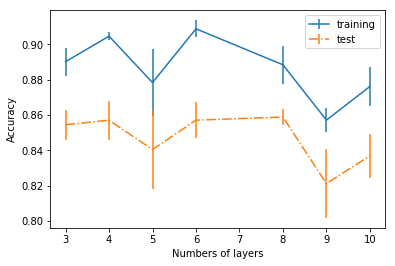

In [12]:
plt.figure()
plt.errorbar(D, train_accuracy, train_stdrr, label='training', linestyle='-')
plt.errorbar(D, test_accuracy, test_stdrr, label='test', linestyle='-.')
# plt.ylim((0.50, 1.00))
plt.xlabel('Numbers of layers')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('./NN.png')
plt.show()